In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [59]:
x,y = make_blobs(n_samples=1000,centers = 3,n_features=2,random_state=23)

In [61]:
x.shape

(1000, 2)

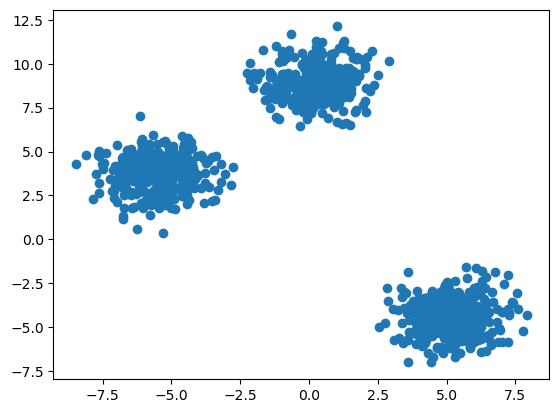

In [63]:
plt.scatter(x[:,0],x[:,1])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [67]:
from sklearn.cluster import KMeans


In [93]:
# elbow method to select the k value
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i , init = 'k-means++')
    km.fit_predict(x_train)
    wcss.append(km.inertia_)
        

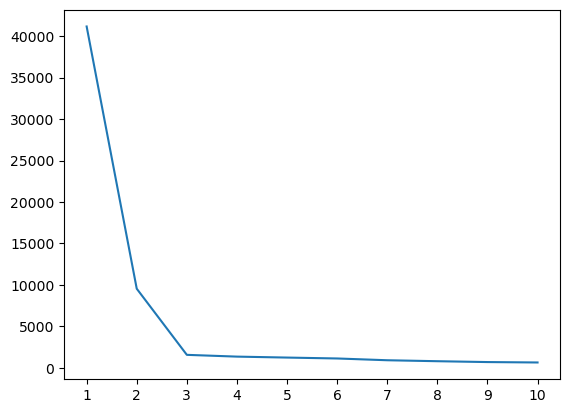

In [71]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [73]:
km = KMeans(n_clusters=3 , init = 'k-means++')
y_labels=km.fit_predict(x_train)

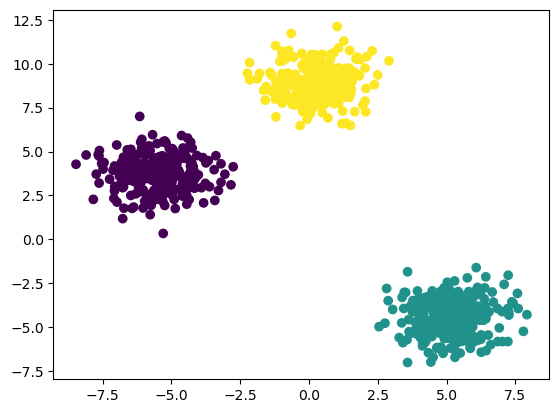

In [75]:
# train data
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [77]:
# test data
y_test_label=km.predict(x_test)

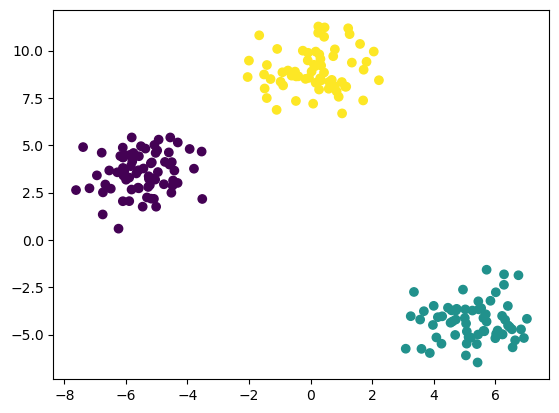

In [79]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

In [81]:
# knee locator  -> it is find k value automaticaly
%pip install --user kneed

Note: you may need to restart the kernel to use updated packages.


In [82]:
from kneed import KneeLocator

In [95]:

kl=KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

In [97]:
### performance metrics

In [99]:
from sklearn.metrics import silhouette_score

In [105]:
silhouette_cofficients =[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train , kmeans.labels_)
    silhouette_cofficients.append(score)
    

In [107]:
silhouette_cofficients

[np.float64(0.7258310358179207),
 np.float64(0.8068049253852778),
 np.float64(0.6381369679561176),
 np.float64(0.49318978176272443),
 np.float64(0.3305339857254884),
 np.float64(0.33751035604647883),
 np.float64(0.3280845669490278),
 np.float64(0.34274823662206017),
 np.float64(0.3271813238280079)]

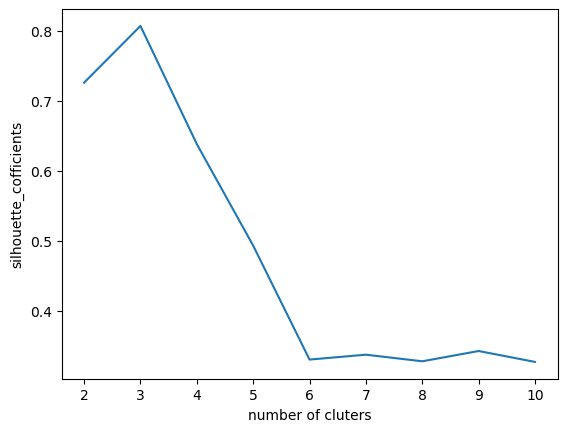

In [109]:
# plotting silhouette score

plt.plot(range(2,11),silhouette_cofficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluters")
plt.ylabel("silhouette_cofficients")
plt.show()